# 🏭 Production Workflow Dashboard

## 1. Introduction
This project analyzes **30 days of production data** from multiple lines and shifts.  
The goal is to:
- Track **key manufacturing KPIs** such as OEE, Availability, Performance, and Quality.  
- Identify major downtime causes and quantify their impact.  
- Highlight defect trends to monitor quality control.  

This dashboard is intended to simulate how production supervisors and managers monitor performance.

---

## 2. Data Sources
The analysis uses three CSV datasets:
- **Production Logs**: daily and shift-level records of units produced, downtime, and cycle times.  
- **Downtime Events**: cause and duration of machine stoppages.  
- **Quality Checks**: number of defective units identified during inspections.  

Data is pre-cleaned and formatted for analysis.

---

In [1]:
pip install pandas matplotlib jupyter

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Load CSVs
prod = pd.read_csv(r"C:\Users\ADMIN\OneDrive\Documents\Projects\production_workflow_dashboard_starter\data\sample_production_logs.csv", parse_dates=["date"])

In [4]:
dt = pd.read_csv(r"C:\Users\ADMIN\OneDrive\Documents\Projects\production_workflow_dashboard_starter\data\downtime_events.csv", parse_dates=["date"])

In [5]:
qc = pd.read_csv(r"C:\Users\ADMIN\OneDrive\Documents\Projects\production_workflow_dashboard_starter\data\quality_checks.csv", parse_dates=["date"])

In [6]:
print(prod.head())
print(prod.info())
print(prod.describe())

        date production_line shift   product  planned_minutes  \
0 2025-07-01          Line-1     A  Widget-A              480   
1 2025-07-01          Line-1     B  Widget-B              480   
2 2025-07-01          Line-1     C  Widget-A              480   
3 2025-07-01          Line-2     A  Widget-B              480   
4 2025-07-01          Line-2     B  Widget-C              480   

   downtime_minutes  downtime_events  ideal_cycle_time_sec  units_total  \
0                45                4                   9.0         2716   
1                50                2                   6.0         3909   
2                44                0                   9.0         2513   
3                47                1                   9.0         2392   
4                27                0                   9.0         3030   

   units_good  units_defect  
0        2611           105  
1        3834            75  
2        2384           129  
3        2204           188  
4       

## 3. KPI Definitions

- **Availability**  
  \[
  Availability = \frac{Planned \; Time - Downtime}{Planned \; Time}
  \]

- **Performance**  
  \[
  Performance = \frac{Actual \; Output}{Theoretical \; Output \; (at \; ideal \; cycle \; time)}
  \]

- **Quality**  
  \[
  Quality = \frac{Good \; Units}{Total \; Units}
  \]

- **Overall Equipment Effectiveness (OEE)**  
  \[
  OEE = Availability \times Performance \times Quality
  \]

Additional metrics:
- **Throughput (units/hour)** = Good Units ÷ Runtime Hours  
- **Defect Rate** = Defective Units ÷ Total Units  

---

## 5. KPI Analysis

### Availability
- Show availability trends across lines/shifts.  
- Comment on downtime impact.

### Performance
- Compare actual vs. theoretical production speed.  
- Identify where cycle time losses occur.

### Quality
- Plot defect rates per line/shift.  
- Highlight unusual spikes in defects.

### OEE (Overall Equipment Effectiveness)
- Calculate and plot OEE over time.  
- Compare across lines.  

In [7]:
#Define KPI calculation functions 
#Procedure:

def calculate_kpis(df):
    planned_time = df["planned_minutes"].sum()
    downtime = df["downtime_minutes"].sum()
    runtime = max(1, planned_time - downtime)
    
    units_total = df["units_total"].sum()
    units_good = df["units_good"].sum()
    units_defect = df["units_defect"].sum()
    
    #KPI formulas
    availability = runtime / planned_time if planned_time else 0
    weighted_ideal = (df["ideal_cycle_time_sec"] * df["units_total"]).sum() / max(1, df["units_total"].sum())
    theoretical_output = runtime * 60 / max(1, weighted_ideal)
    performance = units_total / theoretical_output if theoretical_output else 0
    quality = units_good / max(1, units_total)
    
    oee = availability * performance * quality
    
#Explanation:
#This function calculates OEE and its components (Availability, Performance, Quality). 

    return {
        "OEE": round(oee * 100, 2),
        "Availability": round(availability * 100, 2),
        "Performance": round(performance * 100, 2),
        "Quality": round(quality * 100, 2)
    }

calculate_kpis(prod)

{'OEE': 79.11, 'Availability': 91.72, 'Performance': 90.35, 'Quality': 95.46}

## KPI Analysis :

- OEE is 79.11%
- Availability is 91.72%
- Performance is 90.35%
- Quality is 95.46%

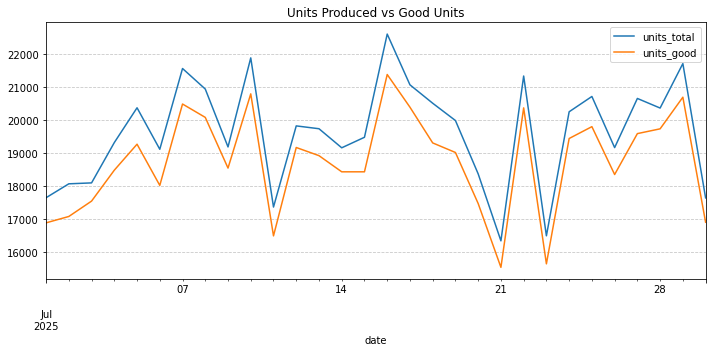

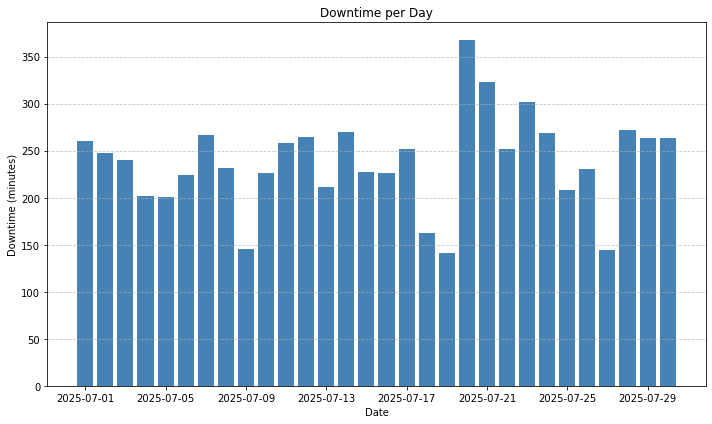

In [8]:
#Plot trends (Production & Downtime over time) 


prod_daily = prod.groupby("date", as_index=False).agg(
    units_total=("units_total", "sum"),
    units_good=("units_good", "sum"),
    downtime_minutes=("downtime_minutes", "sum")
)

# Plot with Matplotlib
prod_daily.plot(x="date", y=["units_total", "units_good"], figsize=(10,5), title="Units Produced vs Good Units")

# Add grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
plt.bar(prod_daily["date"], prod_daily["downtime_minutes"], color="steelblue")
plt.xlabel("Date")
plt.ylabel("Downtime (minutes)")
plt.title("Downtime per Day")

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

#Group by date → daily totals.
#Matplotlib for simple static charts.

## 4. Production Trends

### Daily Production Output
- Chart: Total Units vs. Good Units per Day  
- Insights: Highlight which days had higher/lower production.
##### Answer: 
- July 20th 2025 is the day when downtime has occured the most with 368 minutes.
- July 19th 2025 is the day when downtime has occured the least with 141 minutes.

### Downtime by Line/Shift
- bar chart comparing downtime distribution. 

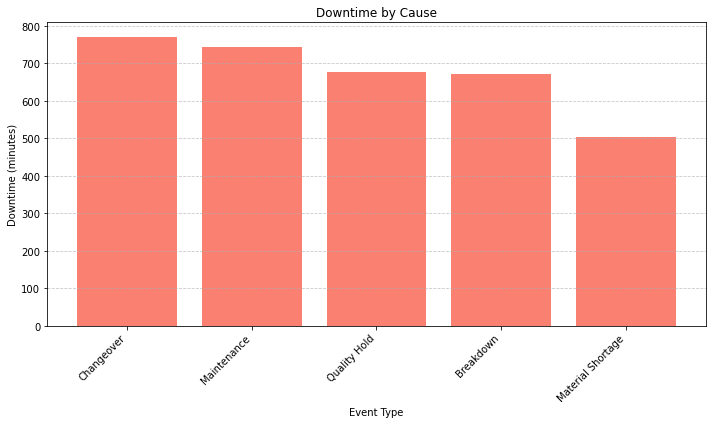

In [9]:
#Analyze downtime causes (Pareto chart)

# Group downtime by cause (already done in your code)
pareto = dt.groupby("event_type", as_index=False)["duration_minutes"].sum().sort_values("duration_minutes", ascending=False)

# Plot with Matplotlib
plt.figure(figsize=(10,6))
plt.bar(pareto["event_type"], pareto["duration_minutes"], color="salmon")

# Labels and title
plt.xlabel("Event Type")
plt.ylabel("Downtime (minutes)")
plt.title("Downtime by Cause")

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha="right")

# Add grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

#Groups downtime by type (maintenance, material shortage, etc.).
#Helps identify the biggest causes of downtime.

## 6. Downtime Analysis

### Downtime by Cause
- Chart: Pareto analysis of downtime causes.  
- Insights: Which causes have the biggest impact?
##### Answer: 
- Changeover event causes the biggest impact with 771 minutes of downtime duration.

## 7. Quality Analysis

### Root Causes
- Potential reasons for high defect days?
###### Answer : 
- Changeover, Maintenance, Quality Hold, Breakdown and Material Shortage are 5 potential reasons of downtime to occur during shifts.

### Defect Trends
- Line chart showing defect rate over time.

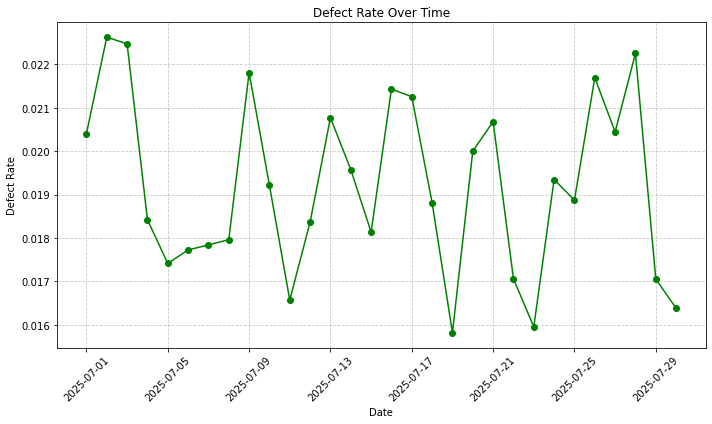

In [10]:
#Analyze quality trends

qc_daily = qc.groupby("date", as_index=False).agg(
    defects_found=("defects_found", "sum"),
    sample_size=("sample_size", "sum")
)
qc_daily["defect_rate"] = qc_daily["defects_found"] / qc_daily["sample_size"]

# Line plot with Matplotlib
plt.figure(figsize=(10,6))
plt.plot(qc_daily["date"], qc_daily["defect_rate"], marker="o", linestyle="-", color="green")

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Defect Rate")
plt.title("Defect Rate Over Time")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Add grid for clarity
plt.grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

#Groups quality checks by day.
#Calculates defect rate = defects ÷ sample size.
#Plot trend to see if quality is improving or declining.

In [11]:
from ipywidgets import interact, Dropdown

In [12]:
#Adding interactivity

def filter_dashboard(line):
    df = prod[prod["production_line"] == line]
    print(calculate_kpis(df))

interact(filter_dashboard, line=Dropdown(options=prod["production_line"].unique()))

#ipywidgets lets you create dropdowns/sliders inside the notebook.
#You can filter by line, shift, or product → see KPIs update instantly.

interactive(children=(Dropdown(description='line', options=('Line-1', 'Line-2'), value='Line-1'), Output()), _…

<function __main__.filter_dashboard(line)>

## 8. Key Insights & Recommendations

- Line 1 : OEE = 78.7% , Availability = 91.87% , Performance = 89.81% , Quality = 95.39%    
- Line 2 : OEE = 79.51% , Availability = 91.57% , Performance = 90.89% , Quality = 95.53%
- Recommendations:  
  1. Implement preventive maintenance to reduce downtime.  
  2. Provide training for Shift-1 supervisors on Line-1.  
  3. Investigate root causes of high defect spikes.  

## 9. Conclusion

This analysis demonstrates how a **Production Workflow Dashboard** can:
- Monitor performance in real-time.  
- Help managers identify and address bottlenecks.  
- Improve decision-making by providing actionable insights.  

Next Steps:
- Connect to live factory database for real-time updates.  
- Automate daily KPI reporting.  
- Expand dashboard to include cost and labor metrics.